In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Chicago_Crime_Detection.csv', index_col=0)
df.head(10)

/home/pritesh/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
5,8950793,12/31/12 20:30,STREET,True,False,2521,25,19,2012
6,8950760,12/31/12 20:10,STREET,False,False,423,4,48,2012
7,8951611,12/31/12 20:00,STREET,False,False,231,2,40,2012
8,8951802,12/31/12 19:00,STREET,True,False,1021,10,29,2012
9,8950706,12/31/12 18:00,STREET,False,False,1215,12,24,2012


In [3]:
df.dtypes
df_sorted = df.sort_values('Date')
df_sorted.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
191640,1310463,1/1/01 0:01,STREET,False,False,1911,NaN,NaN,2001
191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001
191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191634,1918610,1/1/01 0:05,RESIDENCE-GARAGE,False,False,2514,NaN,NaN,2001


In [4]:
df.Date=pd.to_datetime(df.Date)

In [5]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


    Q.1 What is the Month and Year of the median date in our dataset?

In [6]:
df_sorted.Date[((len(df)+1)/2)-1]

'5/21/06 12:30'

In [7]:
df.Date[((len(df)+1)/2)-1]

Timestamp('2006-05-21 12:30:00')

In [8]:
df.Date.astype('int64').median().astype('datetime64[ns]')

numpy.datetime64('2006-05-21T12:30:00.000000000')

In [9]:
df.Date.dt.date

0         2012-12-31
1         2012-12-31
2         2012-12-31
3         2012-12-31
4         2012-12-31
             ...    
191636    2001-01-01
191637    2001-01-01
191638    2001-01-01
191639    2001-01-01
191640    2001-01-01
Name: Date, Length: 191641, dtype: object

In [10]:
df.Date.dt.date.value_counts()

2001-10-13    95
2001-10-12    91
2001-10-26    87
2001-10-05    87
2001-10-17    85
              ..
2009-03-30    18
2009-05-19    17
2011-02-03    17
2010-02-24    17
2011-02-02    14
Name: Date, Length: 4383, dtype: int64

In [11]:
dates = df.Date.dt.date

In [12]:
df['Only_date'] = df.Date.dt.date

In [13]:
df.head(5)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Only_date
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,2012-12-31
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,2012-12-31
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,2012-12-31
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,2012-12-31
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,2012-12-31


    Q.2 On which weekday did most motor vehicle thefts occur?

In [14]:
df['Day'] = df.Date.dt.day_name()

In [15]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Only_date,Day
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,2012-12-31,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,2012-12-31,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,2012-12-31,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,2012-12-31,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,2012-12-31,Monday


In [16]:
df.Day.value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Day, dtype: int64

In [17]:
df.Day.value_counts().sum()

191641

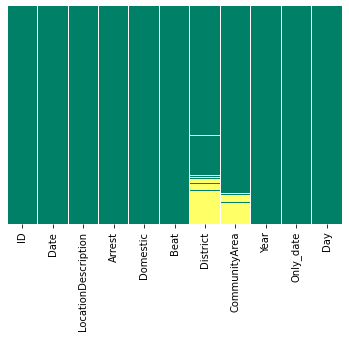

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')

    Q.3 In which month did the lowest motor vehicle thefts occur?

In [19]:
df['Month']=df.Date.dt.month

In [20]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Only_date,Day,Month
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,2012-12-31,Monday,12
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,2012-12-31,Monday,12
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,2012-12-31,Monday,12
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,2012-12-31,Monday,12
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,2012-12-31,Monday,12


In [21]:
#Total number of Arrests
count=0
for i in range(len(df)):
    if df.Arrest[i]==True:
        count+=1

count

15536

In [22]:
# monthwise thefts
df.Month.value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

In [23]:
# daywise thefts
df.Day.value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Day, dtype: int64

    Q.4 Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [24]:
df[df.Arrest==True].head(10)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Only_date,Day,Month
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,2012-12-31,Monday,12
8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012,2012-12-31,Monday,12
13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,2012-12-31,Monday,12
47,8949895,2012-12-30 19:46:00,ALLEY,True,False,2512,25,18,2012,2012-12-30,Sunday,12
59,8949557,2012-12-30 15:00:00,STREET,True,False,2535,25,23,2012,2012-12-30,Sunday,12
69,8949844,2012-12-30 07:15:00,STREET,True,False,414,4,46,2012,2012-12-30,Sunday,12
70,8949258,2012-12-30 07:05:00,STREET,True,False,813,8,62,2012,2012-12-30,Sunday,12
74,8950331,2012-12-30 03:00:00,STREET,True,False,1933,19,6,2012,2012-12-30,Sunday,12
82,8949392,2012-12-30 00:30:00,STREET,True,False,313,3,42,2012,2012-12-30,Sunday,12
85,8949625,2012-12-30 00:00:00,STREET,True,False,1123,11,23,2012,2012-12-30,Sunday,12


In [25]:
df_arrest = df[df.Arrest==True]
df_arrest.head(10)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Only_date,Day,Month
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,2012-12-31,Monday,12
8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012,2012-12-31,Monday,12
13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,2012-12-31,Monday,12
47,8949895,2012-12-30 19:46:00,ALLEY,True,False,2512,25,18,2012,2012-12-30,Sunday,12
59,8949557,2012-12-30 15:00:00,STREET,True,False,2535,25,23,2012,2012-12-30,Sunday,12
69,8949844,2012-12-30 07:15:00,STREET,True,False,414,4,46,2012,2012-12-30,Sunday,12
70,8949258,2012-12-30 07:05:00,STREET,True,False,813,8,62,2012,2012-12-30,Sunday,12
74,8950331,2012-12-30 03:00:00,STREET,True,False,1933,19,6,2012,2012-12-30,Sunday,12
82,8949392,2012-12-30 00:30:00,STREET,True,False,313,3,42,2012,2012-12-30,Sunday,12
85,8949625,2012-12-30 00:00:00,STREET,True,False,1123,11,23,2012,2012-12-30,Sunday,12


In [26]:
# monthwise theft for which arrest was made
df_arrest.Month.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

    Q.5 Yearwise theft?

In [27]:
df['Year'] = df.Date.dt.year
df.head(10)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Only_date,Day,Month
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,2012-12-31,Monday,12
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,2012-12-31,Monday,12
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,2012-12-31,Monday,12
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,2012-12-31,Monday,12
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,2012-12-31,Monday,12
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,2012-12-31,Monday,12
6,8950760,2012-12-31 20:10:00,STREET,False,False,423,4,48,2012,2012-12-31,Monday,12
7,8951611,2012-12-31 20:00:00,STREET,False,False,231,2,40,2012,2012-12-31,Monday,12
8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012,2012-12-31,Monday,12
9,8950706,2012-12-31 18:00:00,STREET,False,False,1215,12,24,2012,2012-12-31,Monday,12


In [28]:
# yearwise thefts
df.Year.value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

    Q.6 Crimes for which more arrests were made are in the first half of the time period or the second half of the time period?

In [29]:
first_half = 0
second_half = 0
for year in df_arrest.Year:
    if year < 2007:
        first_half+=1
    else:
        second_half+=1

print(first_half)
print(second_half)

10588
4948


In [30]:
first_half+second_half == len(df_arrest)

True

    Q.7 For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [31]:
df.Year.value_counts()[0:1]

2001    20669
Name: Year, dtype: int64

In [32]:
df_arrest.Year.value_counts()[0:1]

2001    2152
Name: Year, dtype: int64

In [33]:
(df_arrest.Year.value_counts()[0:1])/(df.Year.value_counts()[0:1])

2001    0.104117
Name: Year, dtype: float64

    Q.8 For what proportion of motor vehicle thefts in 2007 was an arrest made?

In [34]:
# another way
arrest_2007=0
for year in df_arrest.Year:
    if year==2007:
        arrest_2007+=1

theft_2007=0
for year in df.Year:
    if year==2007:
        theft_2007+=1
        
print(arrest_2007)
print(theft_2007)

1212
14280


In [35]:
# proportion of arrest in 2007:
arrest_2007/theft_2007

0.08487394957983194

    Q.9 Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?

In [36]:
df.LocationDescription.value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

    Q.10 Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?

In [37]:
Top5 = df[df.LocationDescription.isin(['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL'])]

In [38]:
Top5.LocationDescription.value_counts()

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [39]:
len(Top5)

177510

    Q.11 On which day of the week do the most motor vehicle thefts at gas stations happen?

In [40]:
Top5.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Only_date,Day,Month
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,2012-12-31,Monday,12
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,2012-12-31,Monday,12
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,2012-12-31,Monday,12
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,2012-12-31,Monday,12
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,2012-12-31,Monday,12


In [41]:
gas_station_thefts = Top5[Top5.LocationDescription=='GAS STATION']

In [42]:
gas_station_thefts.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Only_date,Day,Month
13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,2012-12-31,Monday,12
106,8948353,2012-12-29 10:00:00,GAS STATION,False,False,823,8,66,2012,2012-12-29,Saturday,12
213,8945802,2012-12-27 10:00:00,GAS STATION,False,False,321,3,42,2012,2012-12-27,Thursday,12
278,8943877,2012-12-25 10:00:00,GAS STATION,False,False,332,3,43,2012,2012-12-25,Tuesday,12
290,8943595,2012-12-24 21:55:00,GAS STATION,False,False,421,4,43,2012,2012-12-24,Monday,12


In [43]:
gas_station_thefts.Day.value_counts()

Saturday     338
Sunday       336
Friday       332
Thursday     282
Monday       280
Wednesday    273
Tuesday      270
Name: Day, dtype: int64